In [3]:
import nltk, random
from nltk.corpus import movie_reviews
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/kaungkhantlin/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [4]:
print(len(movie_reviews.fileids()))  # number of documents
print(movie_reviews.categories())  # categories
print(movie_reviews.words()[:100])  # the first 100 words
print(movie_reviews.fileids()[:10])  # the first 10 file names

documents = [
    (list(movie_reviews.words(fileid)), category)
    for category in movie_reviews.categories()
    for fileid in movie_reviews.fileids(category)
]
random.seed(123)
random.shuffle(documents)

print("Number of Reviews/Documents: {}".format(len(documents)))
print("Corpus Size (words): {}".format(np.sum([len(d) for (d, l) in documents])))
print("Sample Text of Doc 1:")
print("-" * 30)
print(" ".join(documents[0][0][:50]))  # first 50 words of the first document

2000
['neg', 'pos']
['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]
['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
Number of Reviews/Documents: 2000
Corpus Size (words): 1583820
Sample Text of Doc 1:
------------------------------
most movies seem to release a third movie just so it can be called a trilogy . rocky iii seems to kind of fit in that category , but manages to be slightly unique . the rocky formula of " rocky loses fight / rocky trains / rocky wins fight
Number of Reviews/Documents: 2000
Corpus Size (words): 1583820
Sample Text of Doc 1:
------------------------------
most movies seem to release a third movie just so it can be called a trilogy . rocky iii seems to kind of fit in that category , but manages to be slightly unique . the rocky formula of " rocky loses fight / rocky trains 

In [5]:
# Check sentiment distribution
from collections import Counter
sentiment_distr = Counter([label for (words, label) in documents])
print("Sentiment Distribution:", sentiment_distr)

Sentiment Distribution: Counter({'pos': 1000, 'neg': 1000})


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Function to train and evaluate model
def train_and_evaluate(documents, test_size, random_state=42):
    print(f"\n{'='*50}")
    print(f"Train/Test Split: {int((1-test_size)*100)}:{int(test_size*100)}")
    print('='*50)
    
    # Split data
    train, test = train_test_split(documents, test_size=test_size, random_state=random_state)
    print(f"Train size: {len(train)}, Test size: {len(test)}")
    print(f"Train distribution: {Counter([label for (words, label) in train])}")
    print(f"Test distribution: {Counter([label for (words, label) in test])}")
    
    # Prepare data
    X_train = [' '.join(words) for (words, label) in train]
    X_test = [' '.join(words) for (words, label) in test]
    y_train = [label for (words, label) in train]
    y_test = [label for (words, label) in test]
    
    # Feature extraction using TF-IDF
    tfidf_vec = TfidfVectorizer(min_df=10, token_pattern=r'[a-zA-Z]+')
    X_train_tfidf = tfidf_vec.fit_transform(X_train)
    X_test_tfidf = tfidf_vec.transform(X_test)
    
    # Train Naive Bayes classifier
    model = GaussianNB()
    model.fit(X_train_tfidf.toarray(), y_train)
    
    # Predictions
    y_pred = model.predict(X_test_tfidf.toarray())
    
    # Evaluation metrics
    accuracy = model.score(X_test_tfidf.toarray(), y_test)
    precision = precision_score(y_test, y_pred, average=None, labels=movie_reviews.categories())
    recall = recall_score(y_test, y_pred, average=None, labels=movie_reviews.categories())
    f1 = f1_score(y_test, y_pred, average=None, labels=movie_reviews.categories())
    
    print(f"\nAccuracy: {accuracy:.4f}")
    print("\nPer-class metrics:")
    for i, cat in enumerate(movie_reviews.categories()):
        print(f"  {cat}: Precision={precision[i]:.4f}, Recall={recall[i]:.4f}, F1={f1[i]:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix:\n{cm}")
    
    return model, y_test, y_pred, cm

In [7]:
# Test with 70:30 split
model_70, y_test_70, y_pred_70, cm_70 = train_and_evaluate(documents, test_size=0.30)


Train/Test Split: 70:30
Train size: 1400, Test size: 600
Train distribution: Counter({'pos': 701, 'neg': 699})
Test distribution: Counter({'neg': 301, 'pos': 299})

Accuracy: 0.7167

Per-class metrics:
  neg: Precision=0.7298, Recall=0.6910, F1=0.7099
  pos: Precision=0.7048, Recall=0.7425, F1=0.7231

Confusion Matrix:
[[208  93]
 [ 77 222]]

Accuracy: 0.7167

Per-class metrics:
  neg: Precision=0.7298, Recall=0.6910, F1=0.7099
  pos: Precision=0.7048, Recall=0.7425, F1=0.7231

Confusion Matrix:
[[208  93]
 [ 77 222]]


In [8]:
# Test with 80:20 split
model_80, y_test_80, y_pred_80, cm_80 = train_and_evaluate(documents, test_size=0.20)


Train/Test Split: 80:20
Train size: 1600, Test size: 400
Train distribution: Counter({'neg': 802, 'pos': 798})
Test distribution: Counter({'pos': 202, 'neg': 198})

Accuracy: 0.7250

Per-class metrics:
  neg: Precision=0.7222, Recall=0.7222, F1=0.7222
  pos: Precision=0.7277, Recall=0.7277, F1=0.7277

Confusion Matrix:
[[143  55]
 [ 55 147]]

Accuracy: 0.7250

Per-class metrics:
  neg: Precision=0.7222, Recall=0.7222, F1=0.7222
  pos: Precision=0.7277, Recall=0.7277, F1=0.7277

Confusion Matrix:
[[143  55]
 [ 55 147]]


In [9]:
# Test with 90:10 split
model_90, y_test_90, y_pred_90, cm_90 = train_and_evaluate(documents, test_size=0.10)


Train/Test Split: 90:10
Train size: 1800, Test size: 200
Train distribution: Counter({'pos': 901, 'neg': 899})
Test distribution: Counter({'neg': 101, 'pos': 99})

Accuracy: 0.7350

Per-class metrics:
  neg: Precision=0.7553, Recall=0.7030, F1=0.7282
  pos: Precision=0.7170, Recall=0.7677, F1=0.7415

Confusion Matrix:
[[71 30]
 [23 76]]

Accuracy: 0.7350

Per-class metrics:
  neg: Precision=0.7553, Recall=0.7030, F1=0.7282
  pos: Precision=0.7170, Recall=0.7677, F1=0.7415

Confusion Matrix:
[[71 30]
 [23 76]]


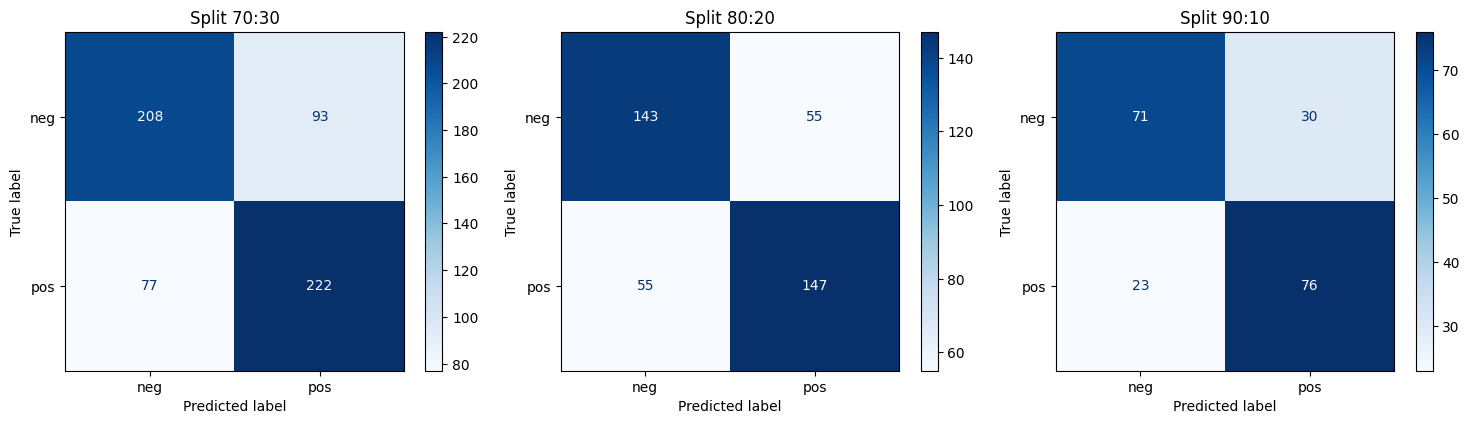

In [10]:
# Plot confusion matrices for all splits
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

splits = [('70:30', cm_70), ('80:20', cm_80), ('90:10', cm_90)]
for ax, (title, cm) in zip(axes, splits):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=movie_reviews.categories())
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(f'Split {title}')

plt.tight_layout()
plt.show()